In [1]:
# Libs
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import probplot
import yulesimon as ys

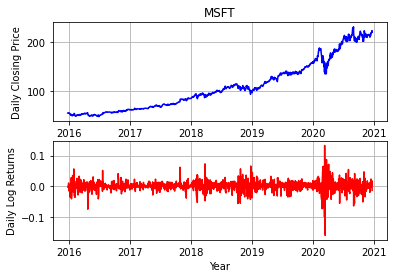

In [2]:
# Get 5 years of Microsoft log returns from Yahoo and plot results
security = 'MSFT'
nyears = 5
closing_prices, log_returns, dates = ys.GetYahooFeed(security,nyears)

# Make Figure(s)
ax1 = plt.subplot(211)
ax1.plot(dates,closing_prices,color='b')
ax1.grid(True)
ax1.set_ylabel('Daily Closing Price')
plt.title(security)

ax2 = plt.subplot(212)
ax2.plot(dates[1:],log_returns,color='r')
ax2.grid(True)
ax2.set_xlabel('Year')
ax2.set_ylabel('Daily Log Returns')

plt.show()

In [3]:
# Create a Yule-Simon time series object
Chain = ys.TimeSeries(log_returns * 100,a0=4.0,b0=4.0)

In [ ]:
# Do Inference 
nsteps = 2000
history = Chain.step(nsteps)

...................................................................................................

In [ ]:
# Check convergence by plotting the log-likelihood
ax3 = plt.subplot()
ax3.plot(history.log_likelihood)
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Log-Likelihood')
ax3.grid(True)
plt.show()

In [ ]:
# Check goodness of fit by plotting the p-values
ax3 = plt.subplot()
ax3.semilogy(history.pvalue)
ax3.set_xlabel('Iteration')
ax3.set_ylabel('p-Values')
ax3.grid(True)
plt.show()

In [ ]:

plt.plot(Chain.data-Chain.mu,'r')
plt.show()

In [ ]:
plt.plot(history.process_noise)
plt.show()

In [ ]:
plt.plot(np.diff(history.mean[:,-1]))
plt.show()

In [ ]:
burnin = nsteps/2.0
downsample = 10
fig1, ax1 = plt.subplots(2,1)
ax1[0].plot(Chain.data)
ax1[0].plot(+2 * ys.ExpectedValue(history.std_deviation,burnin,downsample))
ax1[0].plot(-2 * ys.ExpectedValue(history.std_deviation,burnin,downsample))
ax1[0].grid(True)
ax1[0].autoscale(tight=True)
ax1[1].imshow(np.transpose(history.boundaries))
ax1[1].set_aspect('auto')
plt.show()


In [ ]:
fig3, ax3 = plt.subplots(1,2)
sigma = ys.ExpectedValue(history.std_deviation,burnin,downsample)
res = probplot(log_returns/np.std(log_returns), plot=ax3[0])
res = probplot(log_returns/sigma, plot=ax3[1])
ax3[0].grid(True)
ax3[1].grid(True)
plt.show()


In [ ]:
fig,ax = plt.subplots()
ax.plot(history.hyperparameter_a0,history.hyperparameter_b0)
ax.grid(True)
plt.show()

In [ ]:
fig,ax = plt.subplots(2,1)
ax[0].plot(history.hyperparameter_a0)
ax[1].plot(history.hyperparameter_b0)
plt.show()

In [ ]:
Chain.b0/Chain.a0

In [ ]:
np.var(log_returns)